In [6]:
import pandas as pd

df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
import math
df["r"] = ((df["Width"]+df["Height"])/2)/2
df["Volume"] = math.pi*(df["r"]**2) * ((df["Length1"]+df["Length2"]+df["Length3"])/3)
df

,Species,Weight,Length1,Length2,Length3,Height,Width,r,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,3.885000,1242.319237
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,4.196400,1502.934256
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,4.268475,1555.004718
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,4.296375,1716.508449
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,4.394500,1809.966726
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0.871000,29.473984
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0.924750,33.671708
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0.883200,31.775789
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,1.235000,68.200947


VerificaR la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.

,Weight,Length1,Length2,Length3,Height,Width,r,Volume
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.804625,0.898904
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.724673,0.766312
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.737885,0.776427
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.786569,0.815395
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.983717,0.911259
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.889490,0.856583
r,0.804625,0.724673,0.737885,0.786569,0.983717,0.889490,1.000000,0.935960
Volume,0.898904,0.766312,0.776427,0.815395,0.911259,0.856583,0.935960,1.000000


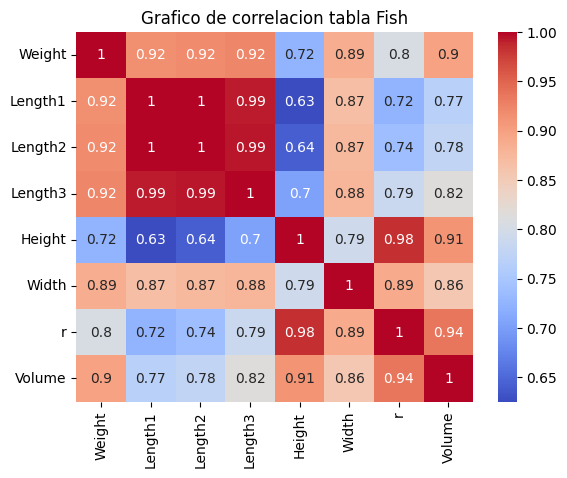

In [8]:
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np

corr = df.select_dtypes(include=["number"])
corre = corr.corr()

snb.heatmap(corre, annot=True, cmap="coolwarm")
plt.title("Grafico de correlacion tabla Fish")
plt.show
corre


-La relacion de peso y longitudes, aumenta, su correlacion esta por encima de 0.87 es una buena correlacion 
- Altura y volumen tiene una correlacioin alta de 0.91 es una correlacion cercana a uno osea que resulta ser de las mas relevantes
- Ancho y volumen tiene una correlacion menor de 0.81

Modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

In [9]:
import statsmodels.api as sm

#añadir constante de caracteristicas
x1 = sm.add_constant(df["Weight"])

#modelo OLS
modelo = sm.OLS(df["Volume"], x1).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     660.8
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           3.83e-58
Time:                        14:49:14   Log-Likelihood:                -1235.0
No. Observations:                 159   AIC:                             2474.
Df Residuals:                     157   BIC:                             2480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.6033     68.380      1.647      0.1

- El modelo arroja un R cuadrado de 0.808, lo que significa que podria ser mejor y estar por encima del 0.9 osea el porcentaje de variabilidad esta en un 80.8%
- El P=0.000 esta muy cercano a 0 osea que tiene una relacion entre la variable dependiente e independiente considerable.

Para el peso de [490] el volumen estaria en 1723.2
Para el peso de [250] el volumen estaria en 934.3
Para el peso de [15] el volumen estaria en 161.9
Para el peso de [1400] el volumen estaria en 4714.2
Para el peso de [800] el volumen estaria en 2742.1


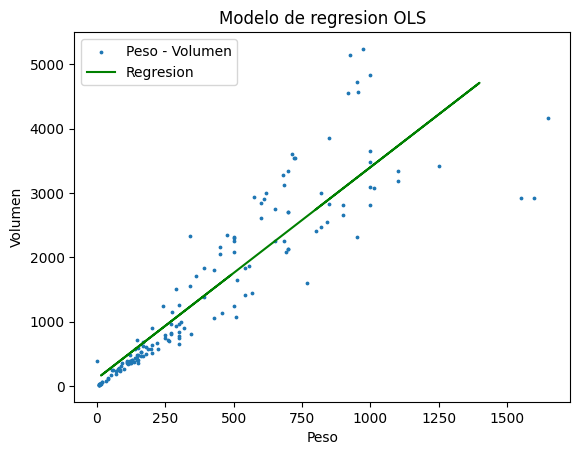

In [10]:
# - Se da nuevos datos para la prediccion para pesos [490], [250], [15], [1400], [800]
Nuevosx = np.array([[490], [250], [15], [1400], [800]])
Nuevosx1 = sm.add_constant(Nuevosx)

# Hacer predicción (asumiendo que 'modelo' ya está entrenado)
Prediccion = modelo.predict(Nuevosx1)

#impresion de resultados con la funcion zip
for e1, e2 in zip(Nuevosx, Prediccion):
    print(f"Para el peso de {e1} el volumen estaria en {e2:.1f}")

#graficar
plt.scatter(df["Weight"], df["Volume"], s=3, label="Peso - Volumen")
#graficar linea
plt.plot(Nuevosx1[:,1], Prediccion, color="green", label="Regresion")
plt.title("Modelo de regresion OLS")
plt.xlabel("Peso")
plt.ylabel("Volumen")
plt.legend()
plt.show()


Modelo anterior por separado a cada especie de peces?

In [11]:
Peces = df["Species"].unique()
Peces

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [12]:
#se determinan los dframe por cada especie: 'Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'
Bream = df[df["Species"] == "Bream"]
Roach = df[df["Species"] == "Roach"]
Whitefish = df[df["Species"] == "Whitefish"]
Parkki = df[df["Species"] == "Parkki"]
Perch = df[df["Species"] == "Perch"]
Pike = df[df["Species"] == "Pike"]
Smelt = df[df["Species"] == "Smelt"]


Para el caso 🐟 Bream 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     441.8
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.12e-20
Time:                        14:49:14   Log-Likelihood:                -247.05
No. Observations:                  35   AIC:                             498.1
Df Residuals:                      33   BIC:                             501.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

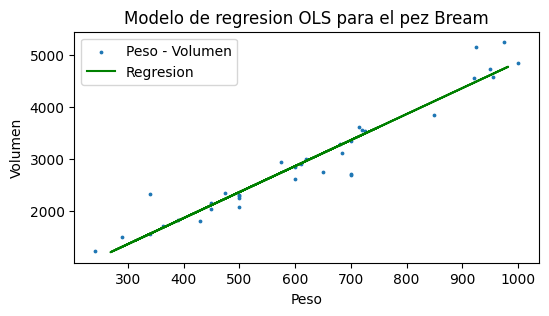

Para el caso 🐟 Roach 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           4.84e-10
Time:                        14:49:14   Log-Likelihood:                -119.25
No. Observations:                  20   AIC:                             242.5
Df Residuals:                      18   BIC:                             244.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

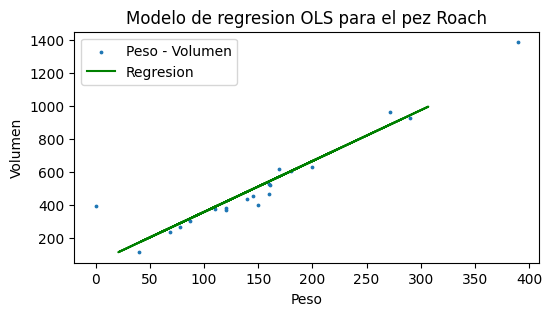

Para el caso 🐟 Whitefish 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     239.2
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           0.000102
Time:                        14:49:14   Log-Likelihood:                -36.271
No. Observations:                   6   AIC:                             76.54
Df Residuals:                       4   BIC:                             76.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/home/AND/.local/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


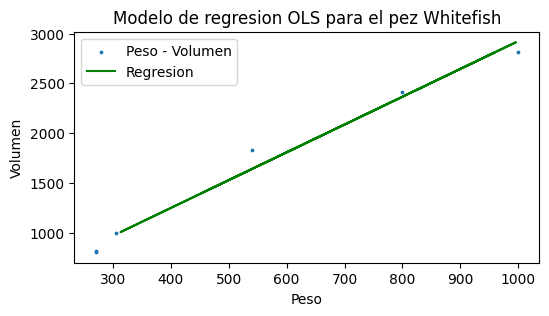

Para el caso 🐟 Parkki 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     561.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.03e-09
Time:                        14:49:14   Log-Likelihood:                -56.309
No. Observations:                  11   AIC:                             116.6
Df Residuals:                       9   BIC:                             117.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

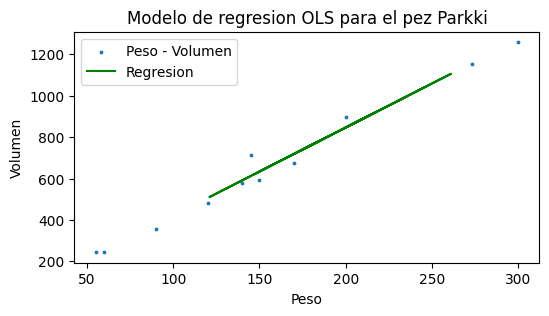

Para el caso 🐟 Perch 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4131.
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.06e-52
Time:                        14:49:14   Log-Likelihood:                -350.48
No. Observations:                  56   AIC:                             705.0
Df Residuals:                      54   BIC:                             709.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

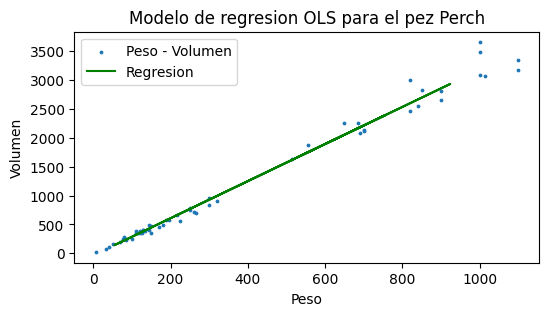

Para el caso 🐟 Pike 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           8.58e-10
Time:                        14:49:15   Log-Likelihood:                -120.60
No. Observations:                  17   AIC:                             245.2
Df Residuals:                      15   BIC:                             246.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

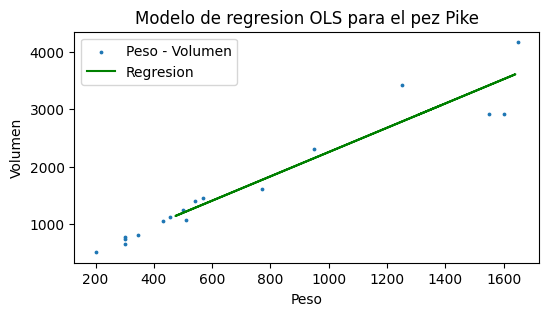

Para el caso 🐟 Smelt 🐠, el modelo siguiente:
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     273.4
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.27e-09
Time:                        14:49:15   Log-Likelihood:                -36.194
No. Observations:                  14   AIC:                             76.39
Df Residuals:                      12   BIC:                             77.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

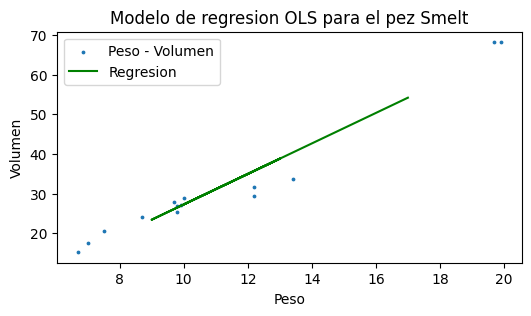

In [13]:
# - Se da nuevos datos para la prediccion para pesos [490], [250], [15], [1400], [800]
#Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'

dataframes = {
    "Bream": Bream,
    "Roach": Roach,
    "Whitefish": Whitefish,
    "Parkki": Parkki,
    "Perch": Perch,
    "Pike": Pike,
    "Smelt": Smelt
}

for name, df in dataframes.items():

    print(f"Para el caso 🐟 {name} 🐠, el modelo siguiente:")
        #añadir constante de caracteristicas
    x1 = sm.add_constant(df["Weight"])

    #modelo OLS
    modelo = sm.OLS(df["Volume"], x1).fit()
    print(modelo.summary())

#se establece minimo y maximo para el random
    b = df["Weight"].max()
    a = df["Weight"].min()

#se detrermina los valores de constantes para el modelo OLS
    Nuevosx = np.random.randint(a, b, 10)
    Nuevosx1 = sm.add_constant(Nuevosx)


    # Hacer predicción (asumiendo que 'modelo' ya está entrenado)
    Prediccion = modelo.predict(Nuevosx1)

    #impresion de resultados con la funcion zip
    for e1, e2 in zip(Nuevosx, Prediccion):
        print(f"Para el peso de {e1} el volumen estaria en {e2:.1f}")

    #graficar
    plt.figure(figsize=(6,3))
    plt.scatter(df["Weight"], df["Volume"], s=3, label="Peso - Volumen")
    #graficar linea
    plt.plot(Nuevosx1[:,1], Prediccion, color="green", label="Regresion")
    plt.title(f"Modelo de regresion OLS para el pez {name}")
    plt.xlabel("Peso")
    plt.ylabel("Volumen")
    plt.legend()
    plt.show()

En general ocurre que al verse el modelo de cada especie por independiente la proporcion de la variabilidad aumenta, osea que cada especie tiene un coportamiento diferente a las otras, y que al agruparlo por especie el modelo mejora y se acomoda a cada comportamiento bilogico por especie en predecir cual podria ser su volumen al estimar un peso, lo que mejora los datos. Verlos de manera = El modelo General = (osea todas las especies) queda de ultimo en su proporcion de variabilidad. Si se hace un listado ordenado de resultados, el modelo mas preciso es la especie de pez Perch.

A continuacion el listado de resultados ordenados po mejor proporcion de mayor a menor:



Para el caso 🐟 Perch 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.987

Para el caso 🐟 Parkki 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.984

Para el caso 🐟 Whitefish 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.984

Para el caso 🐟 Smelt 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.958

Para el caso 🐟 Bream 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.930

Para el caso 🐟 Pike 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.924

Para el caso 🐟 Roach 🐠, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.889

Para el caso GENERAL, el modelo siguiente:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.808

5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

In [ ]:
#tabla ejemplo para 3 variables
Roach.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width,r,Volume
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680,1.60380,116.362430
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217,2.03000,237.346801
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044,2.12000,270.625169
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746,2.19780,304.509922
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742,2.44755,381.412869


                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.70e-11
Time:                        18:18:28   Log-Likelihood:                -109.37
No. Observations:                  20   AIC:                             226.7
Df Residuals:                      16   BIC:                             230.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -655.7275    148.490     -4.416      0.0

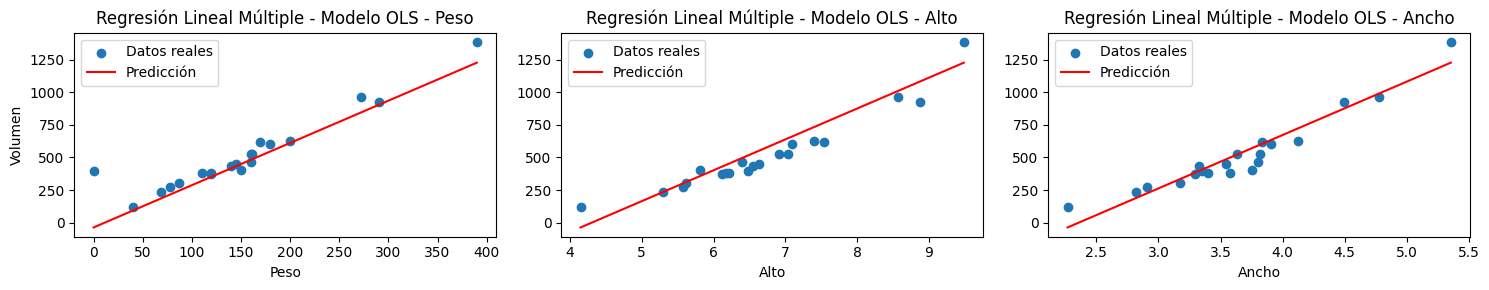

In [ ]:
# Variables independientes
X = Roach[["Weight", "Height", "Width"]]

# Agregar constante para intercepto
X_const = sm.add_constant(X)

# Variable dependiente
Y = Roach[["Volume"]]

# Construir y ajustar el modelo OLS
modelo = sm.OLS(Y, X_const).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Crear datos de prueba para predicción (con mismo número y nombre de variables)
nuevos_datos = pd.DataFrame({
    "X1": np.linspace(X["Weight"].min(), X["Weight"].max(), 30),
    "X2": np.linspace(X["Height"].min(), X["Height"].max(), 30),
    "X3": np.linspace(X["Width"].min(), X["Width"].max(), 30)
})

# Agregar constante
nuevos_datos_const = sm.add_constant(nuevos_datos)

# Calcular predicciones
predicciones = modelo.predict(nuevos_datos_const)

print("REGRESION CON LA ESPECIE ROACH - OLS\n3 variables")

#generar grafico
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

# Graficar:  peso vs Volumen real, y la línea de predicción en X1
ax1.scatter(Roach["Weight"], Y, label="Datos reales")
ax1.plot(nuevos_datos["X1"], predicciones, color="red", label="Predicción")
ax1.set_xlabel("Peso")
ax1.set_ylabel("Volumen")
ax1.set_title("Regresión Lineal Múltiple - Modelo OLS - Peso")
ax1.legend()


# Graficar: Alto  vs Volumen real, y la línea de predicción en X1
ax2.scatter(Roach["Height"], Y, label="Datos reales")
ax2.plot(nuevos_datos["X2"], predicciones, color="red", label="Predicción")
ax2.set_xlabel("Alto")
ax2.set_ylabel("")
ax2.set_title("Regresión Lineal Múltiple - Modelo OLS - Alto")
ax2.legend()

# Graficar: Ancho  vs Volumen real, y la línea de predicción en X1
ax3.scatter(Roach["Width"], Y, label="Datos reales")
ax3.plot(nuevos_datos["X3"], predicciones, color="red", label="Predicción")
ax3.set_xlabel("Ancho")
ax3.set_ylabel("")
ax3.set_title("Regresión Lineal Múltiple - Modelo OLS - Ancho")
ax3.legend()


# Ajustar espacios entre gráficos
plt.tight_layout()

# Mostrar gráfica
plt.show()

Comparando el cuadro tomando como ejemplo el pez Roach con 3 variables, el r2 = 0.959 (95.9%) sube y se aproxima mas a 1 eso quiere decir que si en el estudio se toman mas variables la prediccion estara mas certera que solo tomando 1 sola variable, comparado con el resultado r2 = 0.889 (88.9%)

ESPECIE ROACH:

> 1 variable
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.889


> 3 variables
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.959